### <center> Сравнение алгоритмов классификации

В рамках данного задания нужно решить задачу классификации и спользованием нескольких
алгоритмов классификации: Логистической регрессии, Hаивного Байеса и Л-ближайших соседей.

Нужно выполнить следующие шаги:

1. Обработать категориальные признаки известными способами
2. Привести признаки к одинаковому масштабу для тех алгоритмов, для которых это необходимо.
3. Обучить модели классификации с использованием перечисленных алгоритмов. Выбрать метрики качества.
4. Качество модели проверять с помощью кросс-валидации
5. Для каждого алгоритма выполнить поиск гиперпараметров и определить оптимальные параметры. 
Сделать визуализацию зависимости качества модели от киперпараметров (как было в лекции).
6. Обучить модели с оптимальными параметрами и посмотреть их качество на кросс-валидации, сделать выводы.



**Описание данных:**

**age** - 	numeric,	age of a person

**job** - Categorical,nominal	type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

**marital**	- categorical,nominal	marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

**education**	- categorical,nominal	('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default** - 	categorical,nominal	has credit in default? ('no','yes','unknown')

**housing** - 	categorical,nominal	has housing loan? ('no','yes','unknown')

**loan**	- categorical,nominal	has personal loan? ('no','yes','unknown')

**contact**	- categorical,nominal	contact communication type ('cellular','telephone')

**month** -	categorical,ordinal	last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')

**dayofweek**	- categorical, ordinal	last contact day of the week ('mon','tue','wed','thu','fri')

**duration** -	numeric,	last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

**campaign** -	numeric,	number of contacts performed during this campaign and for this client (includes last contact)

**pdays** -	numeric,	number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
**previous** - numeric,	number of contacts performed before this campaign and for this client
**poutcome** -	categorical,nominal	outcome of the previous marketing campaign ('failure','nonexistent','success')

**y** -	binary, 	has the client subscribed a term deposit? ('yes','no')

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/new_train.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
dfcopy = data.copy()

## Обработка категориальных признаков

default

In [ ]:
default_mapper = {"no": 0,
                "unknown": 1,
                "yes": 2}

In [ ]:
dfcopy["default"] = dfcopy["default"].map(default_mapper)
dfcopy["default"]

0        1
1        0
2        0
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: default, Length: 32950, dtype: int64

job

In [ ]:
one_hot_job = LabelBinarizer()
one_feature_job = one_hot_job.fit_transform(dfcopy["job"])
one_feature_job

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
dfcopy["job"].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [ ]:
jobdict = {dfcopy["job"].unique()[i]: i for i in range(len(dfcopy["job"].unique()))}
jobdict

{'admin.': 3,
 'blue-collar': 0,
 'entrepreneur': 1,
 'housemaid': 11,
 'management': 8,
 'retired': 2,
 'self-employed': 7,
 'services': 5,
 'student': 4,
 'technician': 6,
 'unemployed': 9,
 'unknown': 10}

In [ ]:
dfcopy["job"] = dfcopy["job"].map(jobdict)
dfcopy["job"]

0        0
1        1
2        2
3        3
4        2
        ..
32945    5
32946    6
32947    3
32948    3
32949    3
Name: job, Length: 32950, dtype: int64

marital

In [ ]:
marital_mapper = {"single": 0,
                  "divorced": 0,
                "unknown": 1,
                "married": 2}

In [ ]:
dfcopy["marital"] = dfcopy["marital"].map(marital_mapper)
dfcopy["marital"]

0        2
1        2
2        2
3        2
4        0
        ..
32945    0
32946    2
32947    2
32948    2
32949    2
Name: marital, Length: 32950, dtype: int64

education

In [ ]:
education_mapper = {"unknown": 0,
                    "illiterate": 1,
                    "basic.4y": 2,
                    "basic.6y": 2,
                    "basic.9y": 2,
                    "high.school": 3,
                    "professional.course": 4,
                    "university.degree": 5}

In [ ]:
dfcopy["education"] = dfcopy["education"].map(education_mapper)
dfcopy["education"]

0        2
1        5
2        2
3        5
4        5
        ..
32945    3
32946    4
32947    2
32948    5
32949    5
Name: education, Length: 32950, dtype: int64

housing

In [ ]:
housing_mapper = {"no": 0,
                "unknown": 1,
                "yes": 2}

In [ ]:
dfcopy["housing"] = dfcopy["housing"].map(default_mapper)
dfcopy["housing"]

0        0
1        0
2        0
3        2
4        0
        ..
32945    2
32946    2
32947    0
32948    0
32949    0
Name: housing, Length: 32950, dtype: int64

loan

In [ ]:
loan_mapper = {"no": 0,
                "unknown": 1,
                "yes": 2}

In [ ]:
dfcopy["loan"] = dfcopy["loan"].map(default_mapper)
dfcopy["loan"]

0        0
1        0
2        0
3        0
4        0
        ..
32945    0
32946    0
32947    2
32948    0
32949    2
Name: loan, Length: 32950, dtype: int64

contact

In [ ]:
contact_mapper = {"telephone": 0,
                "cellular": 1}

In [ ]:
dfcopy["contact"] = dfcopy["contact"].map(contact_mapper)
dfcopy["contact"]

0        1
1        0
2        1
3        0
4        1
        ..
32945    1
32946    1
32947    1
32948    0
32949    0
Name: contact, Length: 32950, dtype: int64

month

In [ ]:
# monthdict = {dfcopy["month"].unique()[i]: i+1 for i in range(len(dfcopy["month"].unique()))}
# monthdict - решил отказаться, так как порядок нумерации нарушен
dfcopy["month"].unique()

array(['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep',
       'dec'], dtype=object)

In [ ]:
month_mapper = {"nov": 11,
                "jul": 7,
                "may": 5,
                "jun": 6,
                "aug": 8,
                "mar": 3,
                "oct": 10,
                "apr": 4,
                "sep": 9,
                "dec": 12}
month_mapper

{'apr': 4,
 'aug': 8,
 'dec': 12,
 'jul': 7,
 'jun': 6,
 'mar': 3,
 'may': 5,
 'nov': 11,
 'oct': 10,
 'sep': 9}

In [ ]:
dfcopy["month"] = dfcopy["month"].map(month_mapper)
dfcopy["month"]

0        11
1        11
2         7
3         5
4         6
         ..
32945     7
32946    11
32947     7
32948     5
32949     6
Name: month, Length: 32950, dtype: int64

dayofweek

In [ ]:
dfcopy["day_of_week"].unique()

array(['wed', 'mon', 'tue', 'fri', 'thu'], dtype=object)

In [ ]:
week_mapper = {"wed": 3,
               "mon": 1,
               "tue": 2,
               "fri": 5,
               "thu": 4}

In [ ]:
dfcopy["day_of_week"] = dfcopy["day_of_week"].map(week_mapper)
dfcopy["day_of_week"]

0        3
1        3
2        1
3        1
4        2
        ..
32945    2
32946    5
32947    1
32948    5
32949    2
Name: day_of_week, Length: 32950, dtype: int64

poutcome

In [ ]:
poutcome_mapper = {"failure": 0,
                   "nonexistent": 1,
                   "success": 2}

In [ ]:
dfcopy["poutcome"] = dfcopy["poutcome"].map(poutcome_mapper)
dfcopy["poutcome"]

0        1
1        0
2        1
3        1
4        1
        ..
32945    1
32946    0
32947    1
32948    1
32949    1
Name: poutcome, Length: 32950, dtype: int64

y

In [ ]:
y_mapper = {"no": 0,
            "yes": 1}

In [ ]:
dfcopy["y"] = dfcopy["y"].map(y_mapper)
dfcopy["y"]

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int64

## Cтандартизация

In [ ]:
scaler = RobustScaler()
features = scaler.fit_transform(dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']])
features.shape

(32950, 15)

In [ ]:
target = dfcopy['y']

## Соседи

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
knn = KNeighborsClassifier()
cross_val_score(knn, X=dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], y=target, cv=kf, scoring="f1").mean()

0.445314933439043

In [ ]:
cross_val_score(knn, X=features, y=target, cv=kf, scoring="f1").mean()

0.45212551333212847

## Наивный Байес

In [ ]:
nb = MultinomialNB()
cross_val_score(nb, X=dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], y=target, cv=kf, scoring="f1").mean()

0.5013809140496542

## Логистическая регрессия

In [ ]:
logr = LogR(max_iter=10000)
cross_val_score(logr, dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], target, cv=kf, scoring='f1').mean()

0.4363887073951802

In [ ]:
cross_val_score(logr, features, target, cv=kf, scoring='f1').mean()

0.43686758642816237

## Вывод по данным моделям
**Создав несколько моделей и проверив их с помощью кросс-валидации (в качестве метрики была использована f1-score, так как она сочетает в себе и recall, и precision), я получил не особо хорошие показатели качества их работы. Стоит отметить, что стандартизация улучшила результаты в Соседях и логистической регрессии, однако, это не оказалось достаточно, чтобы обойти Байеса. Это наталкивает на мысль, что среди данных классификаторов он более предпочтителен**

## Поиск гиперпараметров

Так как

Соседи

In [ ]:
param_grid = {'n_neighbors': [i for i in range(1, 20, 1)],
              'weights':['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=kf)
grid_search.fit(dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], target)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.46224820952302653
Best Hyperparameters: {'n_neighbors': 19, 'weights': 'uniform'}


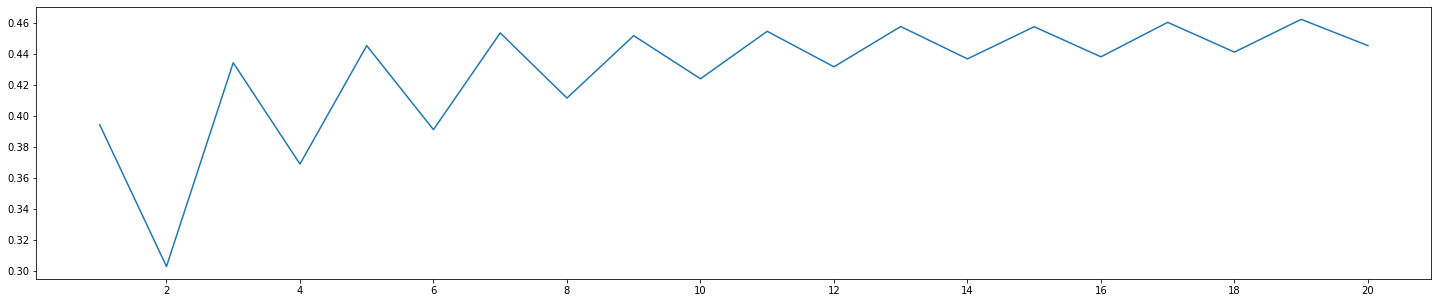

In [ ]:
plt.figure(figsize=(25, 5))
n_neighbors_list, score = [], []
for n in range(1, 21):
    n_neighbors_list.append(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    mean_f1 = cross_val_score(knn, dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']],
                              target, cv=kf, scoring='f1').mean()
    score.append(mean_f1)
plt.xticks([i for i in range(0, 21, 2)])
plt.plot(n_neighbors_list, score);

In [ ]:
param_grid = {'n_neighbors': [i for i in range(1, 20, 1)],
              'weights':['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=kf)
grid_search.fit(features, target)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.4587802106033411
Best Hyperparameters: {'n_neighbors': 16, 'weights': 'distance'}


0.42253635548717894
0.320680890261987
0.4492888134776586
0.36642045068723933
0.45212551333212847
0.39198095336276634
0.45415270526899965
0.406077306212081
0.4502932960556062
0.40752740272693855
0.4511481028814953
0.4111622569617664
0.44946202167230254
0.4167093788712963
0.44347462428182816
0.4197858923203319
0.44508476528088387
0.42167427000387725
0.4462840231667847
0.42594830142936446


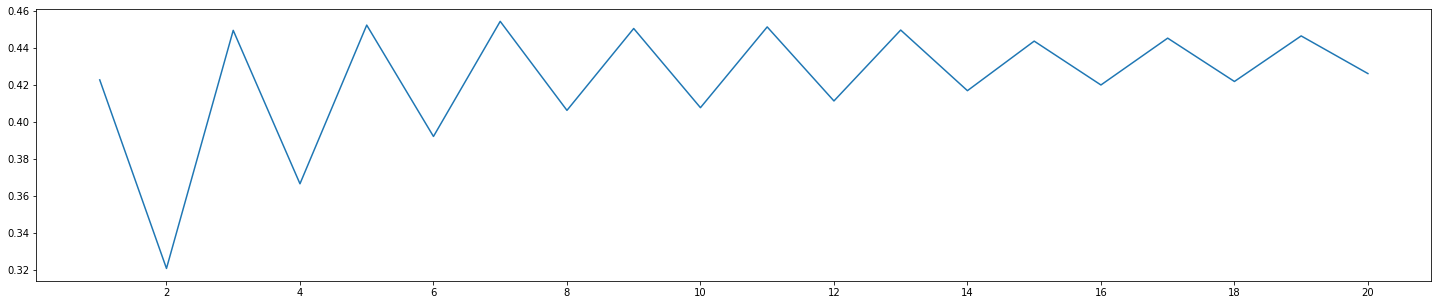

In [ ]:
#решил сделать вывод значений, так как не мог поверить, что стандартизация сработает хуже
#больше делать этого не буду, так как потратил около 10 минут)
plt.figure(figsize=(25, 5))
n_neighbors_list, score = [], []
for n in range(1, 21):
    n_neighbors_list.append(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    mean_f1 = cross_val_score(knn, features, target, cv=kf, scoring='f1').mean()
    score.append(mean_f1)
    print(mean_f1)
plt.xticks([i for i in range(0, 21, 2)])
plt.plot(n_neighbors_list, score);

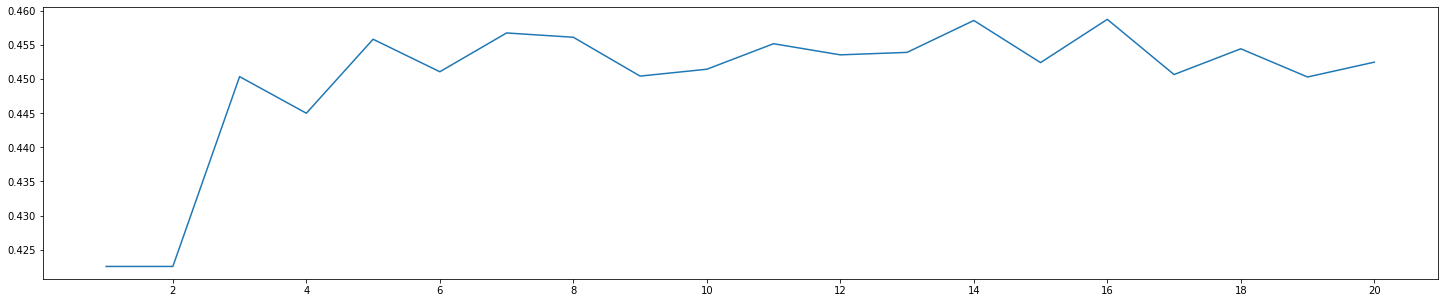

In [ ]:
plt.figure(figsize=(25, 5))
n_neighbors_list, score = [], []
for n in range(1, 21):
    n_neighbors_list.append(n)
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
    mean_f1 = cross_val_score(knn, features, target, cv=kf, scoring='f1').mean()
    score.append(mean_f1)
plt.xticks([i for i in range(0, 21, 2)])
plt.plot(n_neighbors_list, score);

Логистическая регрессия

In [ ]:
param_grid = {'C': [i/10 for i in range(1, 10, 1)],
              'penalty': ['l1', 'l2', 'elasticnet']}
grid_search = GridSearchCV(logr, param_grid, scoring='f1', cv=kf)
grid_search.fit(dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], target)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best Score: 0.43926179669328214
Best Hyperparameters: {'C': 0.8, 'penalty': 'l2'}


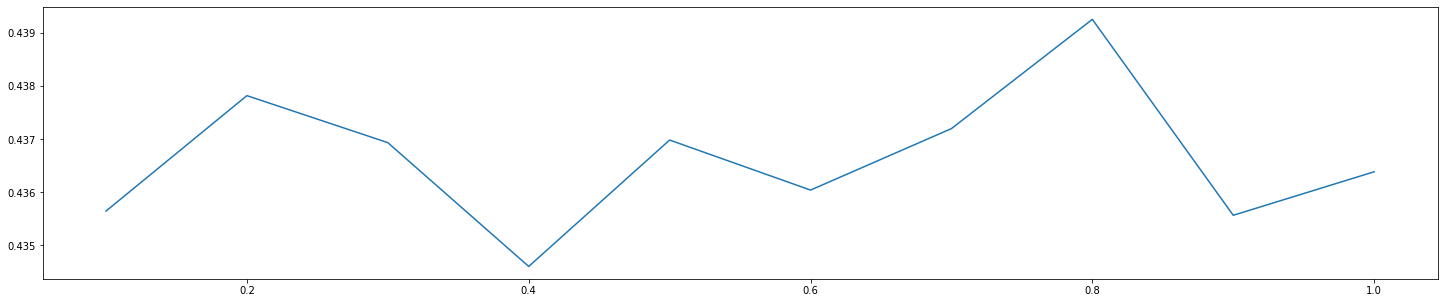

In [ ]:
plt.figure(figsize=(25, 5))
c_list, score = [], []
for n in range(1, 11):
    c_list.append(n/10)
    logr = LogR(C=n/10, max_iter=10000)
    mean_f1 = cross_val_score(logr, dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']],
                              target, cv=kf, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(c_list, score);

In [ ]:
#Здесь стандартизация тоже работает хуже
param_grid = {'C': [i/10 for i in range(1, 10, 1)],
              'penalty': ['l1', 'l2', 'elasticnet']}
grid_search = GridSearchCV(logr, param_grid, scoring='f1', cv=kf)
grid_search.fit(features, target)

print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best Score: 0.43862404333623994
Best Hyperparameters: {'C': 0.8, 'penalty': 'l2'}


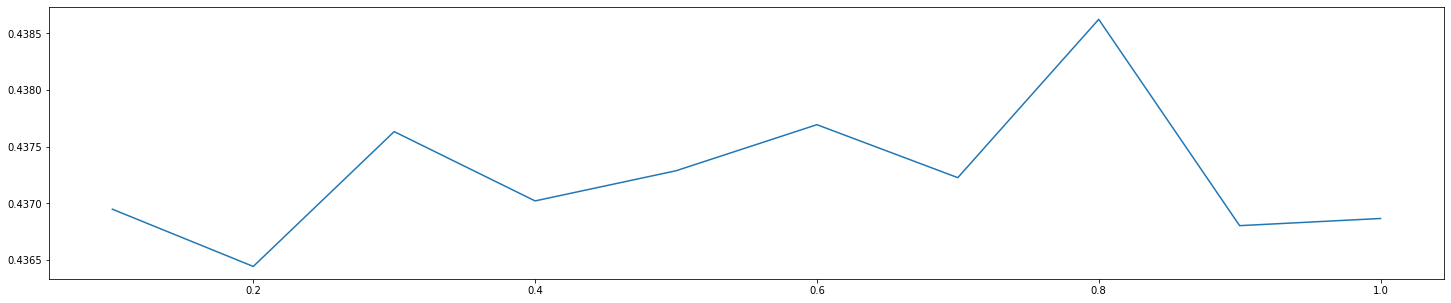

In [ ]:
plt.figure(figsize=(25, 5))
c_list, score = [], []
for n in range(1, 11):
    c_list.append(n/10)
    logr = LogR(C=n/10, max_iter=10000)
    mean_f1 = cross_val_score(logr, features,
                              target, cv=kf, scoring='f1').mean()
    score.append(mean_f1)
plt.plot(c_list, score);

##Оптимальные параметры

In [ ]:
#Собственно, показатель кросс-валидации возрос, что является нормой при оптимальных параметрах
knn = KNeighborsClassifier(n_neighbors=19)
cross_val_score(knn, X=dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], y=target, cv=kf, scoring="f1").mean()

0.46224820952302653

In [ ]:
#забавно)
cross_val_score(knn, X=features, y=target, cv=kf, scoring="f1").mean()

0.4462840231667847

In [ ]:
#Рост есть, но менее заметный
logr = LogR(max_iter=10000, C=0.8)
cross_val_score(logr, dfcopy[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']], target, cv=kf, scoring='f1').mean()

0.43926179669328214

In [ ]:
cross_val_score(logr, features, target, cv=kf, scoring='f1').mean()

0.43862404333623994

**Вывод: как ни странно, но после нахождения оптимальных параметров стандартизация ухудшила модель, что говорит о том, что она не всегда полезна либо Robust - не всегда лучший вариант**

In [ ]:
knn = KNeighborsRegressor()
